In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = '../datasets/data/train_sample.csv'
df = pd.read_csv(filename)

In [3]:
df.columns

Index(['Unnamed: 0', 'srch_id', 'date_time', 'site_id',
       'visitor_location_country_id', 'visitor_hist_starrating',
       'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'srch_query_affinity_score', 'orig_destination_distance', 'random_bool',
       'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate',
       'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff'

In [4]:
null_counts = df.isnull().sum()
refined_cols = null_counts[null_counts <500000]
refined_cols

Unnamed: 0                          0
srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                1437
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2           218370
prop_log_historical_price           0
position                            0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
orig_destination_distance      321301
random_bool                         0
click_bool                          0
booking_bool

In [5]:
cols = []
for items in refined_cols.iteritems():
    cols.append(items[0])

In [6]:
df = df.filter(cols, axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,1,0,4,0,1,1,NaN,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,1,0,4,0,1,1,NaN,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,56880,4,4.0,1,2.83,...,1,0,4,0,1,1,NaN,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,68914,2,3.0,1,2.20,...,1,0,4,0,1,1,NaN,1,1,1
4,1,2013-04-04 08:32:15,12,187,219,88127,3,3.0,1,1.39,...,1,0,4,0,1,1,NaN,1,0,0


In [8]:
df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
orig_destination_distance      float64
random_bool                      int64
click_bool                       int64
booking_bool             

In [9]:
df.max()

srch_id                                     665574
date_time                      2013-06-30 23:58:24
site_id                                         34
visitor_location_country_id                    231
prop_country_id                                230
prop_id                                     140821
prop_starrating                                  5
prop_review_score                                5
prop_brand_bool                                  1
prop_location_score1                          6.98
prop_location_score2                             1
prop_log_historical_price                     6.21
position                                        40
price_usd                              7.04312e+06
promotion_flag                                   1
srch_destination_id                          28416
srch_length_of_stay                             58
srch_booking_window                            498
srch_adults_count                                9
srch_children_count            

### maybe change dtypes to float16 or int16 except some

In [10]:
df.isnull().sum()

srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                1437
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2           218370
prop_log_historical_price           0
position                            0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
orig_destination_distance      321301
random_bool                         0
click_bool                          0
booking_bool                        0
dtype: int64

### maybe do seperate analysis for `prop_location_score2` and `orig_destination_distance` but drop for now

In [11]:
df = df.drop(['prop_location_score2','orig_destination_distance']  , axis=1)

In [12]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,56880,4,4.0,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,68914,2,3.0,1,2.20,...,23246,1,0,4,0,1,1,1,1,1
4,1,2013-04-04 08:32:15,12,187,219,88127,3,3.0,1,1.39,...,23246,1,0,4,0,1,1,1,0,0


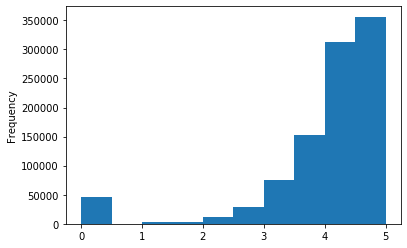

In [13]:
df['prop_review_score'].plot.hist()

### fill prop_review_score with median 

In [14]:
df['prop_review_score'].dtype

dtype('float64')

In [15]:
pd.to_numeric(df['prop_review_score'], errors='coerce')

0         4.0
1         4.0
2         4.0
3         3.0
4         3.0
         ... 
991748    4.5
991749    4.5
991750    4.5
991751    4.0
991752    0.0
Name: prop_review_score, Length: 991753, dtype: float64

In [16]:
# def custom_func(num_str):
#     if pd.isnull(num_str):
#         return num_str
# abc = df['prop_review_score'].map(custom_func)

In [17]:
df['prop_review_score'].fillna((df['prop_review_score'].mean()), inplace=True)

In [18]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,56880,4,4.0,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,68914,2,3.0,1,2.20,...,23246,1,0,4,0,1,1,1,1,1
4,1,2013-04-04 08:32:15,12,187,219,88127,3,3.0,1,1.39,...,23246,1,0,4,0,1,1,1,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991753 entries, 0 to 991752
Data columns (total 24 columns):
srch_id                        991753 non-null int64
date_time                      991753 non-null object
site_id                        991753 non-null int64
visitor_location_country_id    991753 non-null int64
prop_country_id                991753 non-null int64
prop_id                        991753 non-null int64
prop_starrating                991753 non-null int64
prop_review_score              991753 non-null float64
prop_brand_bool                991753 non-null int64
prop_location_score1           991753 non-null float64
prop_log_historical_price      991753 non-null float64
position                       991753 non-null int64
price_usd                      991753 non-null float64
promotion_flag                 991753 non-null int64
srch_destination_id            991753 non-null int64
srch_length_of_stay            991753 non-null int64
srch_booking_window            9

In [20]:
df['prop_review_score'].values

array([4. , 4. , 4. , ..., 4.5, 4. , 0. ])

In [21]:
to_sns = df.drop('date_time', axis=1)

In [22]:
# fig, ax = plt.subplots(figsize=(20,8))         # Sample figsize in inches
# sns.heatmap(to_sns)

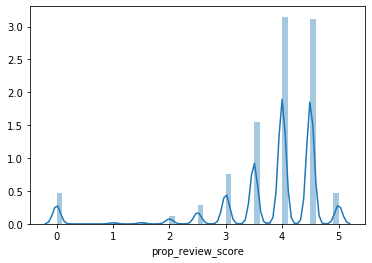

In [23]:
sns.distplot(to_sns['prop_review_score'])

In [24]:
# ax = sns.regplot(x=df['price_usd'], y=df['click_bool'])

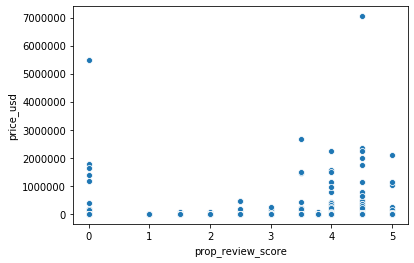

In [25]:
ax = sns.scatterplot(x=df['prop_review_score'], y=df['price_usd'])

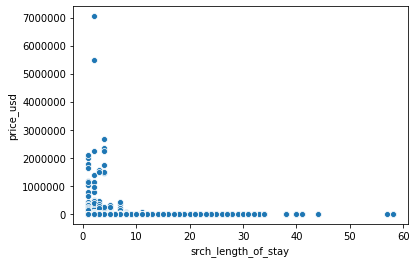

In [26]:
ax = sns.scatterplot(x=df['srch_length_of_stay'], y=df['price_usd'])

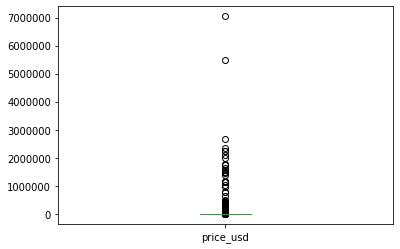

In [27]:
df['price_usd'].plot.box()

In [28]:
df['price_usd'].max(), df['price_usd'].min(), df['price_usd'].mean(), df['price_usd'].median()

(7043117.0, 0.0, 238.86103829280086, 122.05)

In [29]:
price = df[['visitor_location_country_id', 'prop_country_id', 'prop_starrating', 'prop_id', 'srch_length_of_stay', 'position', 'promotion_flag', 'price_usd']][df['price_usd'] > 10000]

In [30]:
price.head(30)

,visitor_location_country_id,prop_country_id,prop_starrating,prop_id,srch_length_of_stay,position,promotion_flag,price_usd
1126,160,23,4,38698,2,26,0,11589.00
1127,160,23,5,75957,2,30,0,17142.00
1129,160,23,4,111036,2,31,0,13303.00
7695,219,219,4,719,3,12,0,210412.00
7696,219,219,2,101652,3,21,1,102601.00
7936,100,100,4,50810,1,1,1,14874.71
16433,216,138,5,24079,1,32,0,26743.00
20452,219,219,3,82897,4,9,1,13651.00
20453,219,219,3,103908,4,13,0,13932.00
20454,219,219,4,114209,4,17,0,18995.00


In [31]:
price.describe()

,visitor_location_country_id,prop_country_id,prop_starrating,prop_id,srch_length_of_stay,position,promotion_flag,price_usd
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,3.820000e+02
mean,148.918848,159.937173,3.659686,72017.204188,2.633508,15.615183,0.329843,2.151324e+05
std,66.735984,74.536477,0.990452,40481.593727,2.025229,9.146867,0.470773,5.834682e+05
min,5.000000,4.000000,0.000000,149.000000,1.000000,1.000000,0.000000,1.000700e+04
25%,92.000000,92.000000,3.000000,40029.750000,1.000000,8.000000,0.000000,1.644212e+04
50%,158.000000,214.500000,4.000000,73058.000000,2.000000,15.000000,0.000000,5.698247e+04
75%,216.000000,219.000000,4.000000,108302.000000,3.000000,24.000000,1.000000,1.770460e+05
max,220.000000,225.000000,5.000000,140696.000000,14.000000,32.000000,1.000000,7.043117e+06


In [32]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 1126 to 962898
Data columns (total 8 columns):
visitor_location_country_id    382 non-null int64
prop_country_id                382 non-null int64
prop_starrating                382 non-null int64
prop_id                        382 non-null int64
srch_length_of_stay            382 non-null int64
position                       382 non-null int64
promotion_flag                 382 non-null int64
price_usd                      382 non-null float64
dtypes: float64(1), int64(7)
memory usage: 26.9 KB


In [33]:
df['prop_country_id'].unique()

array([219, 100, 158,  31, 216,  15,  98,  55,  30, 137, 215, 117,  56,
        53, 181, 221,  35, 202,  99, 132,  59, 127, 109, 131,  70, 220,
       129,  92,  91, 113, 205,  14,  41, 154, 164,   9, 138, 194, 103,
        81,  50,   4, 102, 106,  60,  73,  26,  16, 225,  39,  23, 230,
        32, 212, 125, 157, 185, 151,  71,  10,  80,  68,  33, 152,  61,
       153, 178,  18, 182,  63,  48, 119, 159, 206, 156, 134, 195,  88,
       223,  97, 123, 211, 184,  13,  86, 213,   2,  40,  83,  37,  21,
        17,  45,  74, 229,  47, 224, 200, 149, 122, 187,  27,  93,  69,
       145,  42,  34, 190,  96, 162,  11,  76,  90, 186,  38, 155, 141,
       196, 163, 226, 124,  77, 189, 214, 173, 201,  22, 167, 169, 171,
        65, 179, 146, 203, 143, 177,  51,  72, 136, 128, 120, 111,  19,
       160,  20,  25, 217,  57, 197,  44, 161,  89, 172, 192, 112, 140,
        62, 207, 222, 208,   7,   1,  82,  79,  46, 108, 135, 180, 126])

In [34]:
len(df['prop_id'].unique())

99780

In [35]:
price['prop_id'].unique()

array([ 38698,  75957, 111036,    719, 101652,  50810,  24079,  82897,
       103908, 114209, 134077,  49062,  54876,  67755,  24757,  36763,
        97016,  43966, 121665, 125447,   6193, 127036,  47927, 116314,
         7881,  44634,  88861, 130897,  21362,  96029, 119784,  92307,
       123861,  43287,  41946,  55399,  96513,  21378,  79215,  96490,
       100786, 120146, 137342,  73995,  81800, 137604,  14912,   7310,
        51588,  91068, 118778,  86815,  24037,   6413,  79008, 120160,
        32292,  36498, 133811,  34972,  47977,  85931,  91209,    640,
         9440,  15884, 117347, 134671,  63437,  53684,  53840,  83753,
        32760,  44791,  64433,  42184, 110840, 130667,  80475, 126657,
         2308,  30319,  58481,  67808, 116900,  92190, 100626, 110910,
       113386, 122487, 139453, 128600,   7152,  43683,  62654,  83194,
        84549, 130392,  10552,  11218,  17579, 133579,  62779,  74181,
        34552,  18410,  38419,  33023,  36952, 100748,   2136,  45832,
      

In [36]:
# ax = sns.swarmplot(x='srch_length_of_stay', y='price_usd', data=df)

In [37]:
df.groupby("srch_length_of_stay")['price_usd'].max()

srch_length_of_stay
1     2085957.00
2     7043117.00
3     1556698.00
4     2663400.00
5      336443.00
6        6712.00
7      432576.91
8       62323.22
9       16413.83
10       2986.73
11      77784.00
12       3058.56
13       7204.69
14      13000.00
15       1430.00
16       2721.48
17        659.00
18        459.93
19        940.00
20        644.43
21       1424.44
22        637.00
23       1332.00
24        917.00
25       1453.65
26        627.00
27       2073.00
28        798.62
29        263.00
30        480.00
31        269.00
32        197.18
33        202.65
34        276.00
38         99.72
40        156.25
41        195.00
44        100.00
57        136.10
58        104.84
Name: price_usd, dtype: float64

In [38]:
df.groupby("srch_length_of_stay")['price_usd'].min()

srch_length_of_stay
1       0.00
2       0.00
3       0.01
4       0.07
5       1.35
6       0.04
7       1.46
8       5.11
9       1.72
10      3.41
11     14.00
12     11.48
13     13.51
14      9.09
15      8.37
16      9.97
17      0.01
18      6.54
19     27.90
20     18.39
21     22.00
22     18.00
23      2.68
24     32.03
25     17.06
26     31.15
27     28.00
28     15.00
29     62.00
30     29.00
31     89.00
32     77.55
33     62.00
34     51.00
38     39.89
40     66.75
41     95.00
44     71.00
57    136.10
58     61.67
Name: price_usd, dtype: float64

### something fishy here

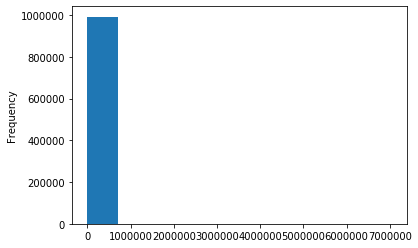

In [39]:
df['price_usd'].plot.hist()

In [40]:
df.srch_length_of_stay.unique()

array([ 1,  2,  4,  3,  6,  9,  5,  8,  7, 14, 12, 10, 15, 11, 17, 27, 28,
       25, 13, 18, 16, 21, 24, 22, 20, 19, 23, 26, 57, 44, 34, 33, 41, 30,
       40, 38, 31, 29, 58, 32])

In [41]:
df.describe()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
count,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,...,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000
mean,332677.874765,9.962170,175.267468,173.909594,70136.849527,3.182634,3.777551,0.634422,2.877260,4.314462,...,14057.236560,2.394920,37.705607,1.972347,0.348943,1.110559,0.500077,0.296968,0.044696,0.027917
std,192409.173543,7.657661,65.927270,68.349406,40607.105554,1.050491,1.049921,0.481592,1.533212,1.838563,...,8116.914091,2.079985,52.309325,0.856763,0.729524,0.421949,0.500000,0.456923,0.206635,0.164736
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,166145.000000,5.000000,100.000000,100.000000,35117.000000,3.000000,3.500000,0.000000,1.790000,4.440000,...,7100.000000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,332627.000000,5.000000,219.000000,219.000000,69678.000000,3.000000,4.000000,1.000000,2.770000,4.910000,...,13570.000000,2.000000,17.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,499700.000000,14.000000,219.000000,219.000000,105258.000000,4.000000,4.500000,1.000000,4.040000,5.310000,...,21143.000000,3.000000,49.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,665574.000000,34.000000,231.000000,230.000000,140821.000000,5.000000,5.000000,1.000000,6.980000,6.210000,...,28416.000000,58.000000,498.000000,9.000000,9.000000,8.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price',
       'position', 'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'random_bool', 'click_bool', 'booking_bool'],
      dtype='object')

In [46]:
df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
random_bool                      int64
click_bool                       int64
booking_bool                     int64
dtype: object

In [47]:
data = df.drop('date_time', axis=1)

In [49]:
data.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,12,187,219,10404,4,4.0,1,2.20,5.03,...,23246,1,0,4,0,1,1,1,0,0
1,1,12,187,219,27348,2,4.0,1,2.83,4.39,...,23246,1,0,4,0,1,1,1,0,0
2,1,12,187,219,56880,4,4.0,1,2.83,5.15,...,23246,1,0,4,0,1,1,1,0,0
3,1,12,187,219,68914,2,3.0,1,2.20,4.44,...,23246,1,0,4,0,1,1,1,1,1
4,1,12,187,219,88127,3,3.0,1,1.39,4.80,...,23246,1,0,4,0,1,1,1,0,0


In [61]:
X = data.iloc[:, :-1]
y = data.iloc[:, -2:-1]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
# from sklearn.tree import DecisionTreeClassifier

# parameters = {'max_depth': [3, 10, None]}
# decision_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=30)

# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(decision_tree, parameters, cv=3, scoring='roc_auc')
# grid_search.fit(X, y)
# print(grid_search.best_params_)

{'max_depth': 3}


In [65]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
y_pred = clf.predict(X_test)

/home/shree/personal_projects/Click-Through-Rate/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/shree/personal_projects/Click-Through-Rate/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[1.20564397e-02 0.00000000e+00 0.00000000e+00 7.70061155e-04
 0.00000000e+00 5.31339940e-02 0.00000000e+00 0.00000000e+00
 1.16097536e-05 4.26406804e-02 4.80206114e-01 3.44992636e-02
 7.68952412e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.99786596e-01]


In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9547786445204245